In [ ]:
Проект: вариант 1
    
Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по 
исследованию нескольких аспектов мобильного приложения:

В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, 
какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.

In [ ]:
Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention 
игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:

shared/problem1-reg_data.csv – данные о времени регистрации
shared/problem1-auth_data.csv – данные о времени захода пользователей в игру

Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на 
части (сэмпле) данных.

In [ ]:
План исследования
Задание 1
1. Загрузка данных
2. Предварительный анализ данных 
3. Преобразование данных в формат даты 
4. Функция для подсчета retention
Задание 2
1. Загрузка данных
2. Предварительный анализ данных 
3. Расчет результатов A/B теста для тестовой и контрольной групп
4. Проверка статистической значимости
5. Выводы
Задание 3
1. Метрики для оценки результатов события
2. Изменения в наборе метрик при усложнении механики
3. Выводы

In [ ]:
1. Загрузка данных

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загрузка данных
registration_data = pd.read_csv('problem1-reg_data.csv', sep=';')  
activity_data = pd.read_csv('problem1-auth_data.csv', sep=';') 


In [ ]:
2. Предварительный анализ данных 

In [3]:
# Анализ данных о регистрации
registration_data.head() 

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [4]:
registration_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [5]:
# Проверка на пропущенные значения
registration_data.isnull().sum()

reg_ts    0
uid       0
dtype: int64

In [6]:
# Проверка на дубликаты
registration_data.duplicated().sum()

0

In [7]:
# Анализ данных об авторизации
activity_data.head() 


,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [8]:
activity_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [9]:
# Проверка на пропущенные значения
activity_data.isnull().sum()

auth_ts    0
uid        0
dtype: int64

In [10]:
# Проверка на дубликаты
activity_data.duplicated().sum()

0

In [ ]:
3. Преобразование данных в формат даты 

In [11]:
# Преобразование столбца reg_ts в формат даты
registration_data['reg_ts'] = pd.to_datetime(registration_data['reg_ts'], unit='s')

# Проверка данных после преобразования
registration_data.head()

,reg_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,2000-01-13 22:27:27,3
3,2000-05-28 14:19:01,4
4,2000-09-16 11:21:53,5


In [12]:
# Преобразование столбца auth_ts в формат даты
activity_data['auth_ts'] = pd.to_datetime(activity_data['auth_ts'], unit='s')

# Проверка данных после преобразования
activity_data.head()

,auth_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,1999-07-25 16:46:46,2
3,1999-07-31 03:50:15,2
4,1999-08-05 17:49:39,2


In [13]:
print("Диапазон дат регистрации:")
print(f"Минимальная дата: {registration_data['reg_ts'].min()}")
print(f"Максимальная дата: {registration_data['reg_ts'].max()}")

Диапазон дат регистрации:
Минимальная дата: 1998-11-18 09:43:43
Максимальная дата: 2020-09-23 15:17:24


In [14]:
print("Диапазон дат авторизации:")
print(f"Минимальная дата: {activity_data['auth_ts'].min()}")
print(f"Максимальная дата: {activity_data['auth_ts'].max()}")

Диапазон дат авторизации:
Минимальная дата: 1998-11-18 09:43:43
Максимальная дата: 2020-09-23 15:17:24


In [15]:
# Добавляем столбец с годом регистрации
registration_data['reg_year'] = registration_data['reg_ts'].dt.year

# Считаем количество уникальных uid по годам для регистрации
registration_counts = registration_data.groupby('reg_year')['uid'].nunique().reset_index()
registration_counts.columns = ['Год', 'Регистрация']

# Выводим результаты
print("Количество уникальных пользователей по годам:")
print(registration_counts)


Количество уникальных пользователей по годам:
     Год  Регистрация
0   1998            1
1   1999            1
2   2000            4
3   2001            6
4   2002           10
5   2003           20
6   2004           35
7   2005           65
8   2006          119
9   2007          216
10  2008          394
11  2009          718
12  2010         1308
13  2011         2385
14  2012         4361
15  2013         7932
16  2014        14455
17  2015        26344
18  2016        48187
19  2017        87645
20  2018       159729
21  2019       291102
22  2020       354963


In [16]:
# Добавляем столбец с годом авторизации
activity_data['auth_year'] = activity_data['auth_ts'].dt.year

# Считаем количество уникальных uid по годам для авторизации
activity_counts = activity_data.groupby('auth_year')['uid'].nunique().reset_index()
activity_counts.columns = ['Год', 'Авторизация']

# Выводим результаты
print("Количество уникальных пользователей по годам:")
print(activity_counts)


Количество уникальных пользователей по годам:
     Год  Авторизация
0   1998            1
1   1999            1
2   2000            5
3   2001            7
4   2002           11
5   2003           21
6   2004           37
7   2005           66
8   2006          122
9   2007          227
10  2008          415
11  2009          754
12  2010         1376
13  2011         2531
14  2012         4638
15  2013         8448
16  2014        15422
17  2015        28128
18  2016        51461
19  2017        93667
20  2018       170777
21  2019       311202
22  2020       391646


In [ ]:
4. Функция для подсчета retention

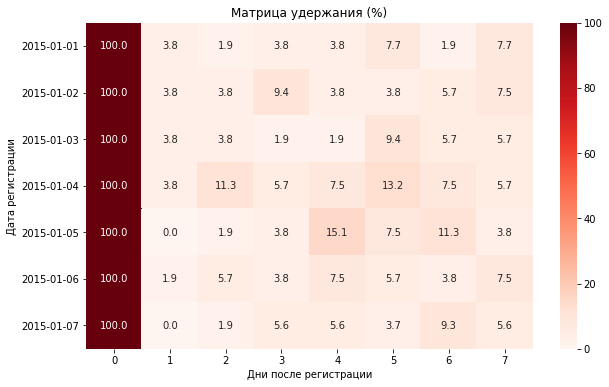

In [17]:
def calculate_retention(registration_data, activity_data, period=None, number_of_days=7):
    """
    Рассчитывает коэффициент удержания пользователей на основе данных о регистрации и активности.

    Параметры:
    registration_data (DataFrame): Данные о регистрации пользователей, содержащие столбцы 'uid' и 'reg_ts'.
    activity_data (DataFrame): Данные о активности пользователей, содержащие столбцы 'uid' и 'auth_ts'.
    period (tuple, optional): Кортеж из двух строковых значений, представляющих начальную и конечную даты 
                              (в формате 'YYYY-MM-DD') для фильтрации данных о регистрации. 
                              Если не указано, используются все данные.
    number_of_days (int, optional): Максимальное количество дней после регистрации для расчета удержания. 
                                      По умолчанию равно 7.

    Возвращает:
    DataFrame: Матрица удержания, где строки представляют даты регистрации, 
                а столбцы - дни после регистрации, заполненные процентами удержания пользователей.
    """
    # Преобразуем в даты и фильтруем по нужному периоду
    if registration_data['reg_ts'].dtype != 'period[D]':
        registration_data['reg_ts'] = pd.to_datetime(registration_data['reg_ts'], unit='s').dt.to_period('D')
    if activity_data['auth_ts'].dtype != 'period[D]':
        activity_data['auth_ts'] = pd.to_datetime(activity_data['auth_ts'], unit='s').dt.to_period('D')

    if period is not None:
        registration_data = registration_data[registration_data['reg_ts'].between(pd.Period(period[0], 'D'), 
                                                                                  pd.Period(period[1], 'D'))]

    # Объединяем данные о регистрации и активности
    merged = activity_data.merge(registration_data[['uid', 'reg_ts']], on='uid', how='inner')[['uid', 'reg_ts', 'auth_ts']]
    
    # Считаем дни от регистрации
    merged['days_after_reg'] = (merged['auth_ts'] - merged['reg_ts']).apply(lambda x: x.n)

    # Убираем действия вне нужного интервала
    merged = merged[merged['days_after_reg'].between(0, number_of_days)]

    # Считаем retention: сколько уникальных пользователей было в каждый день после регистрации
    cohort_pivot = (
        merged
        .groupby(['reg_ts', 'days_after_reg'])['uid']
        .nunique()
        .unstack(fill_value=0)
    )

    # Количество новых пользователей в каждый день
    cohort_sizes = cohort_pivot[0]

    # Делим на количество регистраций, чтобы получить retention в %
    retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

    # Визуализация
    plt.figure(figsize=(10, 6))
    sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="Reds")
    plt.title('Матрица удержания (%)')
    plt.xlabel('Дни после регистрации')
    plt.ylabel('Дата регистрации')
    plt.show()

    return retention_matrix

# Тестирование функции на данных с фильтрацией по датам
retention_result = calculate_retention(
    registration_data,
    activity_data,
    period=('2015-01-01', '2015-01-07'),
    number_of_days=7
)



In [18]:
retention_result

days_after_reg,0,1,2,3,4,5,6,7
reg_ts,,,,,,,,
2015-01-01,100.0,3.846154,1.923077,3.846154,3.846154,7.692308,1.923077,7.692308
2015-01-02,100.0,3.773585,3.773585,9.433962,3.773585,3.773585,5.660377,7.547170
2015-01-03,100.0,3.773585,3.773585,1.886792,1.886792,9.433962,5.660377,5.660377
2015-01-04,100.0,3.773585,11.320755,5.660377,7.547170,13.207547,7.547170,5.660377
2015-01-05,100.0,0.000000,1.886792,3.773585,15.094340,7.547170,11.320755,3.773585
2015-01-06,100.0,1.886792,5.660377,3.773585,7.547170,5.660377,3.773585,7.547170
2015-01-07,100.0,0.000000,1.851852,5.555556,5.555556,3.703704,9.259259,5.555556


In [ ]:
Задание 2
Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. 
Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 
оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

Формат данных: Проект_1_Задание_2.csv

In [ ]:
1. Загрузка данных

In [19]:
# Загрузка данных
data = pd.read_csv('Проект_1_Задание_2.csv', sep=';')

In [ ]:
2. Предварительный анализ данных 

In [20]:
# Анализ данных
data.head() 

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [21]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [22]:
# Проверка на пропущенные значения
data.isnull().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [23]:
# Проверка на дубликаты
data.duplicated().sum()

0

In [ ]:
3. Расчет результатов A/B теста для тестовой и контрольной групп

In [24]:
# Разделяем данные на контрольную и тестовую группы
group_a = data[data['testgroup'] == 'a']
group_b = data[data['testgroup'] == 'b']

# Фильтрация пользователей с revenue > 0
group_a_paying = group_a[group_a['revenue'] > 0]
group_b_paying = group_b[group_b['revenue'] > 0]


In [25]:
# Расчет метрик для контрольной группы (группа A)
control_users = group_a['user_id'].nunique()  # Общее количество пользователей
control_paying_users = group_a_paying['user_id'].nunique()  # Количество платящих пользователей
control_revenue = group_a['revenue'].sum()  # Общая выручка

if control_users > 0:
    control_cr = control_paying_users / control_users  # Конверсия
    control_arpu = control_revenue / control_users  # ARPU
else:
    control_cr = 0
    control_arpu = 0

if control_paying_users > 0:
    control_arppu = control_revenue / control_paying_users  # ARPPU
else:
    control_arppu = 0

# Вывод результатов
print(f"Контрольная группа (A): CR = {control_cr:.2%}")
print(f"Контрольная группа (A): ARPU = {control_arpu:.2f}")
print(f"Контрольная группа (A): ARPPU = {control_arppu:.2f}")
print(f"Контрольная группа (A): Платящие пользователи = {control_paying_users}/{control_users}")   


Контрольная группа (A): CR = 0.95%
Контрольная группа (A): ARPU = 25.41
Контрольная группа (A): ARPPU = 2664.00
Контрольная группа (A): Платящие пользователи = 1928/202103


In [26]:
# Расчет метрик для тестовой группы (группа B)
test_users = group_b['user_id'].nunique()  # Общее количество пользователей
test_paying_users = group_b_paying['user_id'].nunique()  # Количество платящих пользователей
test_revenue = group_b['revenue'].sum()  # Общая выручка

if test_users > 0:
    test_cr = test_paying_users / test_users  # Конверсия
    test_arpu = test_revenue / test_users  # ARPU
else:
    test_cr = 0
    test_arpu = 0

if test_paying_users > 0:
    test_arppu = test_revenue / test_paying_users  # ARPPU
else:
    test_arppu = 0

# Вывод результатов
print(f"Тестовая группа (B): CR = {test_cr:.2%}") 
print(f"Тестовая группа (B): ARPU = {test_arpu:.2f}")
print(f"Тестовая группа (B): ARPPU = {test_arppu:.2f}")
print(f"Тестовая группа (B): Платящие пользователи = {test_paying_users}/{test_users}")


Тестовая группа (B): CR = 0.89%
Тестовая группа (B): ARPU = 26.75
Тестовая группа (B): ARPPU = 3003.66
Тестовая группа (B): Платящие пользователи = 1805/202667


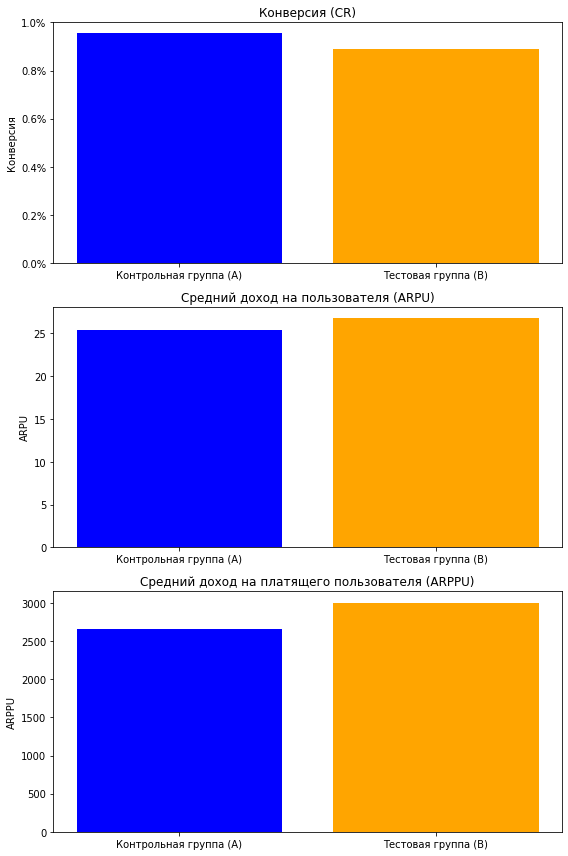

In [27]:
# Подготовка данных для графиков
labels = ['Контрольная группа (A)', 'Тестовая группа (B)']
cr_values = [control_cr, test_cr]
arpu_values = [control_arpu, test_arpu]
arppu_values = [control_arppu, test_arppu]

# Создание графиков
x = np.arange(len(labels))  # Место для групп

# Настройка графиков
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# График для CR
axs[0].bar(x, cr_values, color=['blue', 'orange'])
axs[0].set_title('Конверсия (CR)')
axs[0].set_ylabel('Конверсия')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_ylim(0, 0.01)  # Установка пределов по оси Y
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))  # Форматирование Y в проценты

# График для ARPU
axs[1].bar(x, arpu_values, color=['blue', 'orange'])
axs[1].set_title('Средний доход на пользователя (ARPU)')
axs[1].set_ylabel('ARPU')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)

# График для ARPPU
axs[2].bar(x, arppu_values, color=['blue', 'orange'])
axs[2].set_title('Средний доход на платящего пользователя (ARPPU)')
axs[2].set_ylabel('ARPPU')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)

# Отображение графиков
plt.tight_layout()
plt.show()

In [ ]:
4. Проверка статистической значимости

In [28]:
# Проверка статистической значимости для CR (хи-квадрат)

# Создаем таблицу сопряженности для платящих и неплатящих пользователей
contingency_table = pd.DataFrame({
    'Платящие': [control_paying_users, test_paying_users],  # Количество платящих пользователей в контрольной и тестовой группах
    'Неплатящие': [control_users - control_paying_users, test_users - test_paying_users]  # Количество неплатящих пользователей
})

# Выполняем тест хи-квадрат для проверки независимости
# chi2 - значение статистики хи-квадрат, p_chi2 - p-значение
chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)

print(f"Хи-квадрат: {chi2:.2f}, P-Value: {p_chi2:.4f}")

# Интерпретация результатов
if p_chi2 < 0.05:
    print("Различия в конверсии статистически значимы.")
else:
    print("Различия в конверсии не статистически значимы.")


Хи-квадрат: 4.37, P-Value: 0.0365
Различия в конверсии статистически значимы.


In [29]:
# Проверка статистической значимости для ARPU (t-критерий)

control_revenue_data = group_a['revenue']  # Данные о выручке для контрольной группы
test_revenue_data = group_b['revenue']     # Данные о выручке для тестовой группы

# Выполняем t-тест для независимых выборок
# equal_var=False указывает, что мы не предполагаем равенство дисперсий в двух группах
t_stat, p_t = stats.ttest_ind(control_revenue_data, test_revenue_data, equal_var=False)

print(f"T-критерий: {t_stat:.2f}, P-Value: {p_t:.4f}")

# Интерпретация результатов
if p_t < 0.05:
    print("Различия в ARPU статистически значимы.")
else:
    print("Различия в ARPU не статистически значимы.")


T-критерий: -0.62, P-Value: 0.5330
Различия в ARPU не статистически значимы.


In [30]:
# Проверка статистической значимости для ARPPU (t-критерий)

# Данные о выручке от платящих пользователей для контрольной и тестовой групп
control_revenue_data = group_a_paying['revenue']  # Выручка от платящих пользователей в контрольной группе
test_revenue_data = group_b_paying['revenue']      # Выручка от платящих пользователей в тестовой группе

# Проверка статистической значимости с использованием t-критерия
# equal_var=False указывает, что мы не предполагаем равенство дисперсий в двух группах
t_stat, p_t = stats.ttest_ind(control_revenue_data, test_revenue_data, equal_var=False)

print(f"T-критерий: {t_stat:.2f}, P-Value: {p_t:.4f}")

# Интерпретация результатов
if p_t < 0.05:
    print("Различия в ARPPU статистически значимы.")
else:
    print("Различия в ARPPU не статистически значимы.")



T-критерий: -1.64, P-Value: 0.1002
Различия в ARPPU не статистически значимы.


In [ ]:
Объяснение выбора t-критерия:
    
Доходы пользователей — случайные величины из одного и того же распределения, необязательно нормального. 
    При условии, что пользователи независимы, существует центральная предельная теорема, говорящая нам о том, 
    что среднее значение метрики по достаточно большой выборке пользователей будет иметь нормальное распределение. 
    Именно это и использует z-критерий (сравнивая значения z-оценки с точками на этом распределении), и именно
    распределение средних и должно быть нормальным для t-теста. 
Это важный результат, который следует учитывать: в центральной предельной теореме нет требований к распределению 
    самой метрики, поэтому не следует ожидать нормальности входных данных для применения z- и t-тестов.


In [ ]:
5. Выводы

На основе проведенного A/B-теста и анализа полученных данных можно сделать следующие выводы.
В контрольной группе (A) конверсия (CR) составила 0.95%, в то время как в тестовой группе (B) она снизилась 
до 0.89%. Результаты проверки статистической значимости для конверсии показали, что различия являются статистически 
значимыми (хи-квадрат: 4.37, P-Value: 0.0365). Это указывает на то, что изменение в конверсии между группами 
не является случайным и может быть связано с изменениями, внесенными в тестовую группу.

Что касается среднего дохода на пользователя (ARPU), то в контрольной группе он составил 25.41, а в тестовой 
группе — 26.75. Однако результаты проверки статистической значимости (t-критерий: -0.62, P-Value: 0.5330) 
показали, что различия в ARPU не являются статистически значимыми. Аналогично, средний доход на платящего 
пользователя (ARPPU) в контрольной группе составил 2664.00, а в тестовой группе — 3003.66, но различия также не 
достигли статистической значимости (t-критерий: -1.64, P-Value: 0.1002).

Таким образом, несмотря на то, что тестовая группа (B) показала более высокий ARPU и ARPPU, снижение конверсии 
(CR) является значительным и указывает на ухудшение ключевой метрики.

Главный вопрос: Можно ли считать эксперимент удачным и выкатывать новый вариант (B) на всех?
Ответ: Нет. Снижение конверсии в тестовой группе является статистически значимым, что свидетельствует о том, 
    что новый вариант не только не улучшает, но и ухудшает общую эффективность. Рекомендуется оставить текущую 
    версию (A). 

In [ ]:
Задание 3
В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить 
уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд 
уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок 
будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

In [ ]:
1. Метрики для оценки результатов события

1.1 Уровень участия (Participation Rate):
Процент игроков, которые приняли участие в событии по сравнению с общим числом игроков. Это поможет понять, насколько событие 
было привлекательным.

1.2 Процент завершения (Completion Rate):
Доля игроков, которые успешно завершили событие и получили награды. Это поможет оценить сложность события и его 
привлекательность.

1.3 Среднее время прохождения (Average Completion Time):
Среднее время, затраченное игроками на завершение события. Это может помочь понять, насколько время, отведенное на событие, 
было адекватным.

1.4 Количество попыток (Attempts):
Среднее количество попыток, необходимых игрокам для завершения уровней события. Это может дать представление о сложности 
уровней.

1.5 Награды и их использование (Rewards Utilization):
Процент игроков, которые использовали полученные награды после завершения события. Это поможет понять, насколько ценные 
награды для игроков.

1.6 Обратная связь от игроков (Player Feedback):
Опросы или отзывы игроков о событии. Это может дать качественные данные о том, что понравилось или не понравилось игрокам.


In [ ]:
2. Изменения в наборе метрик при усложнении механики

Если в следующем событии усложняется механика, и при каждой неудачной попытке игрок откатывается на несколько уровней назад, 
набор метрик может измениться следующим образом:

2.1 Уровень откатов (Rollback Rate):
Количество откатов, которые игроки испытывают в процессе прохождения уровней. Это поможет оценить, насколько новая механика 
влияет на игровой процесс.

2.2 Процент успешных попыток (Success Rate):
Доля успешных попыток по сравнению с общим числом попыток. Это поможет понять, насколько игроки справляются с новыми условиями.

2.3 Среднее количество откатов (Average Rollbacks):
Среднее количество откатов, которые игроки испытывают за событие. Это может помочь оценить, насколько новая механика усложняет 
игру.

2.4 Время на откат (Rollback Time):
Среднее время, затраченное игроками на возвращение к предыдущим уровням после откатов. Это может дать представление о том, 
как новая механика влияет на общее время прохождения события.

2.5 Изменение в уровне участия (Participation Change):
Сравнение уровня участия в событиях до и после изменения механики. Это поможет понять, как изменения повлияли на интерес 
игроков.

2.6 Обратная связь о механике откатов (Rollback Feedback):
Сбор отзывов игроков о новой механике откатов. Это поможет понять, как игроки воспринимают изменения и насколько они влияют 
на их опыт.


In [ ]:
3. Выводы

Таким образом, при оценке результатов тематических событий в игре можно использовать различные метрики, которые помогут 
понять, насколько успешно прошло событие и как игроки взаимодействовали с ним. При изменении механики событий, особенно если 
она усложняется, набор метрик может измениться, чтобы учесть новые аспекты игрового процесса и взаимодействия игроков.